In [33]:
#imports

import pandas as pd
import numpy as np
import logomaker
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Step 1 - load the energies of peptides

Make sure you have the file with precomputed energies: rosettaPPPEnergies.csv

In [34]:
def pppene_to_array(tmp):
    tmp = tmp.replace("(", "")
    tmp = tmp.replace(")", "")
    tmp = tmp.strip("[]")
    tmp = tmp.replace(" ", "")
    tmp = tmp.replace("\n", ",")
    return np.fromstring(tmp, dtype=float, sep=", ").reshape(9,20)

ppp_ene = pd.read_csv("rosettaPPPEnergies.csv")
ppp_ene = ppp_ene[["allele", "peptide", "binder", "ba", "energies", "total_energy"]]
ppp_ene["energies"] = ppp_ene["energies"].apply(pppene_to_array)
ppp_ene

allele    peptide  binder        ba  \
0      A0101  YLEQLHQLY       1  0.574375   
1      A0101  HSERHVLLY       1  0.574375   
2      A0101  MTDPEMVEV       1  0.574375   
3      A0101  LTDFIREEY       1  0.574375   
4      A0101  LLDQRPAWY       1  0.574375   
...      ...        ...     ...       ...   
77576  C1601  QQTTTSFQN       0  0.000000   
77577  C1601  QQVEQMEIP       0  0.000000   
77578  C1601  QQWQVFSAE       0  0.000000   
77579  C1601  QRCVVLRFL       0  0.000000   
77580  C1601  QRISFEVLA       0  0.000000   

                                                energies  total_energy  
0      [[-9.37669305, 4.67802037, 8.54111444, 10.3367...    112.623867  
1      [[-7.89190954, 0.93707113, 10.06233605, 2.7158...     91.902185  
2      [[-8.25236275, 10.56587939, 7.5793572, 1.14710...    146.451590  
3      [[-8.43720197, 10.21830335, 7.113905, 36.51672...    138.735082  
4      [[-8.18944861, 12.37002534, 6.69837214, 8.0238...    142.756344  
...                                                  ...           ...  
77576  [[-8.23468271, 4.14167228, 9.40648541, 38.0082...    128.349704  
77577  [[-9.20362039, 22.89414572, 10.40234849, 35.70...    159.872992  
77578  [[-8.46025926, 3.82365938, 10.25920191, 61.414...     97.152888  
77579  [[-7.11160825, 1.35151526, 9.62650699, 20.2230...    116.714004  
77580  [[-8.46216776, 5.91464051, 9.83828238, 45.0747...    112.405199  

[77581 rows x 6 columns]

## Step 2 - pick a portion of peptides to represent

In [35]:
# I picked first 1000 peptides

start = 0
end = 1000

ppp_ene_tmp = ppp_ene[start:end]
ppp_ene_tmp

allele    peptide  binder        ba  \
0    A0101  YLEQLHQLY       1  0.574375   
1    A0101  HSERHVLLY       1  0.574375   
2    A0101  MTDPEMVEV       1  0.574375   
3    A0101  LTDFIREEY       1  0.574375   
4    A0101  LLDQRPAWY       1  0.574375   
..     ...        ...     ...       ...   
995  A0101  VLDILLEQY       1  0.574375   
996  A0101  TVDEHVWFY       1  0.574375   
997  A0101  QTEASALLY       1  0.574375   
998  A0101  IMEKSTMLY       1  0.574375   
999  A0101  LLSTYLERY       1  0.574375   

                                              energies  total_energy  
0    [[-9.37669305, 4.67802037, 8.54111444, 10.3367...    112.623867  
1    [[-7.89190954, 0.93707113, 10.06233605, 2.7158...     91.902185  
2    [[-8.25236275, 10.56587939, 7.5793572, 1.14710...    146.451590  
3    [[-8.43720197, 10.21830335, 7.113905, 36.51672...    138.735082  
4    [[-8.18944861, 12.37002534, 6.69837214, 8.0238...    142.756344  
..                                                 ...           ...  
995  [[-7.603952, 6.7546119, 5.81545328, 12.6967854...    208.144877  
996  [[-6.61019485, 2.89739136, 8.10269428, 0.79273...     85.593206  
997  [[-8.56079388, 12.12004727, 10.30680414, 25.13...    134.073638  
998  [[-9.33293593, 5.56601012, 7.66091783, 3.84369...    133.985434  
999  [[-8.09305321, 2.71306649, 6.76949773, 47.4575...    115.090082  

[1000 rows x 6 columns]

## Step 3 - check out the logo of the selection

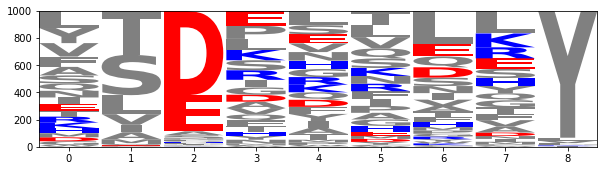

In [36]:
hla_peptides = ppp_ene_tmp["peptide"]
crp_counts_df =logomaker.alignment_to_matrix(sequences=hla_peptides, to_type='counts')
logomaker.Logo(crp_counts_df, color_scheme="charge")

## Step 4 - check out the energy heatmaps

In [40]:
refenetype=[('fa_atr', '<f8'), 
            ('fa_rep', '<f8'), 
            ('fa_sol', '<f8'), 
            ('fa_intra_rep', '<f8'), 
            ('fa_intra_sol_xover4', '<f8'), 
            ('lk_ball_wtd', '<f8'), 
            ('fa_elec', '<f8'), 
            ('pro_close', '<f8'), 
            ('hbond_sr_bb', '<f8'), 
            ('hbond_lr_bb', '<f8'),
            ('hbond_bb_sc', '<f8'), 
            ('hbond_sc', '<f8'), 
            ('dslf_fa13', '<f8'), 
            ('omega', '<f8'), 
            ('fa_dun', '<f8'), 
            ('p_aa_pp', '<f8'), 
            ('yhh_planarity', '<f8'), 
            ('ref', '<f8'), 
            ('rama_prepro', '<f8'), 
            ('total_score', '<f8')]

energies = ppp_ene_tmp["energies"]

fig = make_subplots(7,3, 
    subplot_titles=[e[0] for e in refenetype])

for i, elem in enumerate(refenetype):
    
    data = np.array(energies.apply(lambda x: x[:,i]).tolist())
    x = list(range(9))*data.shape[0]
    y = data.flatten()
    
    fig.add_trace(go.Histogram2d(
        x = x,
        y = y,
    coloraxis = "coloraxis", name=elem[0])
        , int(i/3)+1,i%3+1)

fig.update_layout(
    width=1500,
    height=3000
)

fig.show()
